## <center> When will the Covid-19 Pandemic End? </center>
<img src="../Desktop/img.jpg" />

### <b> Let's go !!! </b>

In [1]:
#Ignore worning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Handling
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
# Data Visulation Libraries
from matplotlib import pyplot
from pandas.plotting import lag_plot
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load url's for dataset
confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [4]:
# Read Dataset
confirmed_df = pd.read_csv(confirmed)  
deaths_df = pd.read_csv(deaths)  
recovered_df = pd.read_csv(recovered)  

In [5]:
#Let's Check dataset
confirmed_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055


In [6]:
deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1472,1473,1477,1479,1480,1481,1481,1485,1488,1492
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,413,416,420,424,429,434,439,443,448,451


In [7]:
# Nooo... We dont want that

confirmed_df.set_index('Country/Region', inplace=True)
deaths_df.set_index('Country/Region', inplace=True)
recovered_df.set_index('Country/Region', inplace=True)

confirmed_df = confirmed_df.drop(['Province/State','Lat','Long' ], axis =1)
deaths_df = deaths_df.drop(['Province/State','Lat','Long'],axis =1)
recovered_df =  recovered_df.drop(['Province/State','Lat','Long'],axis =1)


In [8]:
# transpose them
confirmed = confirmed_df.T
deaths = deaths_df.T
recovered = recovered_df.T

In [9]:
#Check for dataset
deaths.reset_index(inplace = True) 
deaths.head()

Country/Region,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
deaths.columns

Index(['index', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=268)

In [11]:
deaths.columns.name = None

In [12]:
deaths.head(2)

,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
deaths.rename(columns={'index':'Date'},inplace = True)

In [14]:
deaths['Date'] = pd.to_datetime(deaths['Date'])

In [15]:
deaths.head(2)

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## CONCENTRATE ON INDIA
### """ Sare Jahan Se Achha Hindustan Hamara """

In [16]:
#First need to calculate Cumulative dataset for deaths in india
result = []
for i in range(len(deaths.India)+1):
    if i == (len(deaths.India)+1):
        r = deaths.India[:]
    else:
        r = deaths.India[:i].tolist()
    r = sum(r)
    result.append(r)

In [17]:
len(result)

272

- len(result) is not matching with death variable due to first value append in result is zero and which is incorrect

In [18]:
# Avoid first value
increment_result = result[1:]

In [19]:
increment_result[40:60]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 6, 8, 10, 13, 16, 20, 25, 29]

In [20]:
#create dataframe from list
df = pd.DataFrame(deaths['Date'])

In [21]:
#Add target(conversion factor into dataframe)
df["Op"] = increment_result

In [22]:
df.head(2)

,Date,Op
0,2020-01-22,0
1,2020-01-23,0


In [23]:
#dataframe is cleaned
df.head(2)

,Date,Op
0,2020-01-22,0
1,2020-01-23,0


In [24]:
#Conversion method used
levitts_conversion = []

for i in range(len(df)):
    if i == 0:
        print(i)
        current_epi = 1
    else:
        current_epi = (df.Op[i] / df.Op[i-1])

    levitts_conversion.append(current_epi)


0


In [25]:
len(levitts_conversion)

271

In [26]:
#Add target(conversion factor into dataframe)
df["l_m"] = levitts_conversion

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 3 columns):
Date    271 non-null datetime64[ns]
Op      271 non-null int64
l_m     223 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 6.5 KB


In [28]:
# missing value replace
df.replace(np.nan, 0)

,Date,Op,l_m
0,2020-01-22,0,1.000000
1,2020-01-23,0,0.000000
2,2020-01-24,0,0.000000
3,2020-01-25,0,0.000000
4,2020-01-26,0,0.000000
...,...,...,...
266,2020-10-14,6793954,1.016650
267,2020-10-15,6906115,1.016509
268,2020-10-16,7019113,1.016362
269,2020-10-17,7133144,1.016246


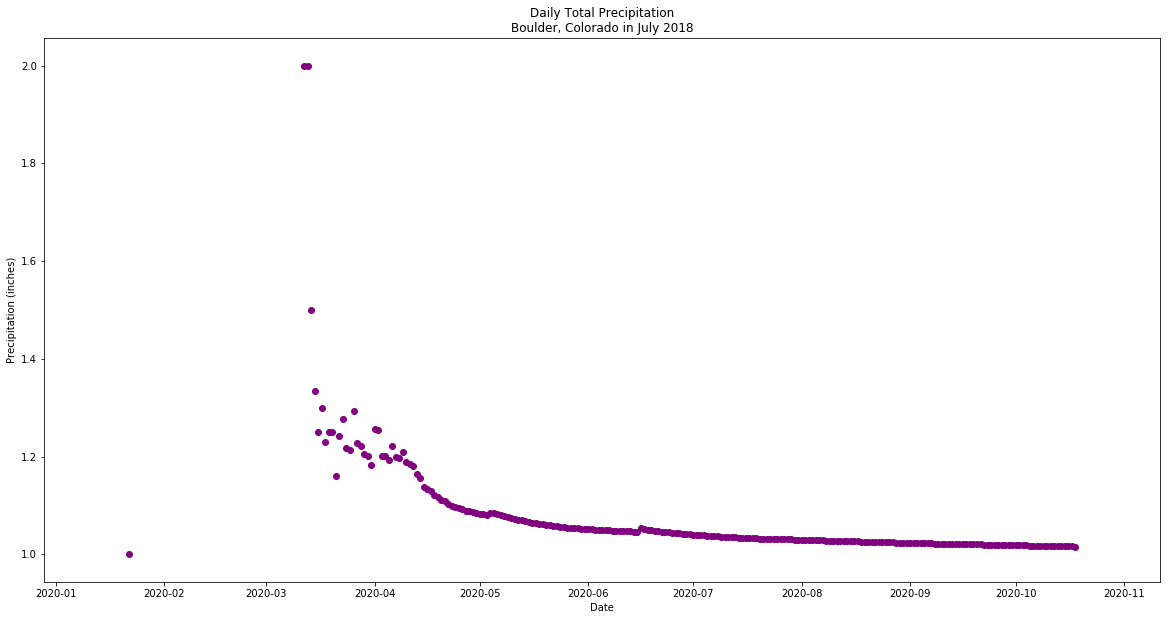

In [29]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.Date,df.l_m,color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

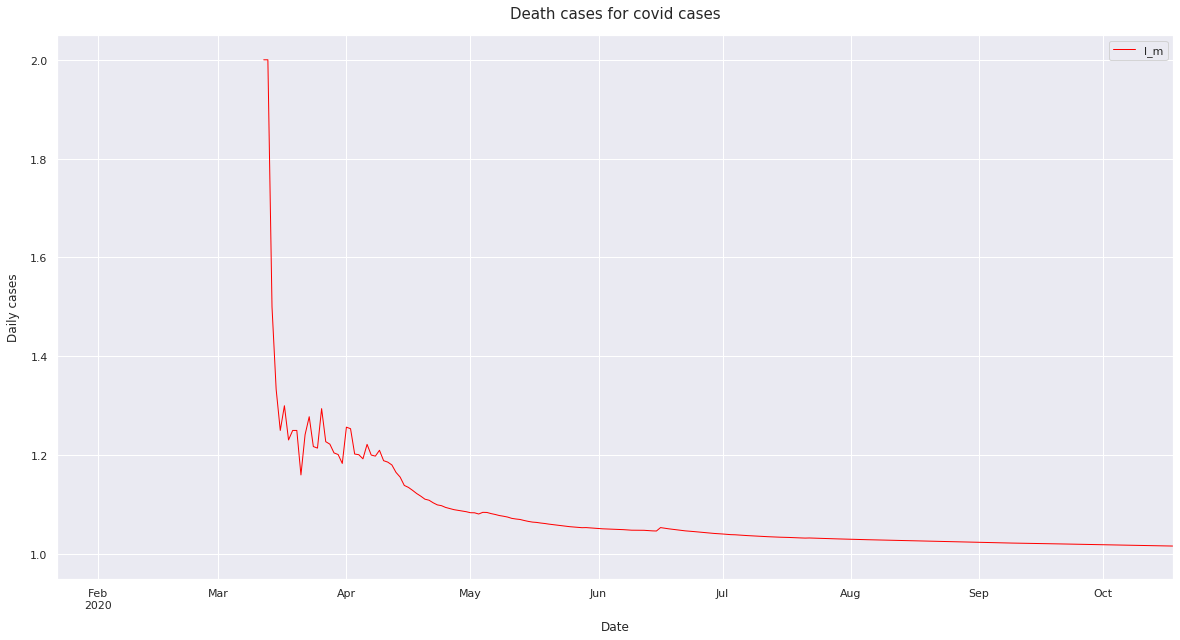

In [30]:
#line plo
sns.set(font_scale=1)
df.set_index('Date')['l_m'].plot(figsize=(20, 10), linewidth=1, color='red')
plt.xlabel("Date", labelpad=10)
plt.ylabel("Daily cases", labelpad=10)
plt.legend()
plt.title("Death cases for covid cases", y=1.02, fontsize=15);


## Levitt’s Metric on Indian Data

###### Funtction for dataset visualization

- For recent deaths = 100 dates

In [31]:
# Funtction 
def plot_dataset(column_name):
    """
    Cleaning, conversion, plotting of data
    """
    # Cumulative dataset creation
    result = []
    for i in range(len(deaths)+1):
        if i == (len(deaths)+1):
            r = deaths[column_name][:]
        else:
            r = deaths[column_name][:i].tolist()
        r = sum(r)
        result.append(r)

    #create dataframe from list
    df = pd.DataFrame(deaths['Date'])

    #Final Cumulative list [first element is invalid]
    increment_result = result[1:]
    
    #Add target(conversion factor into dataframe)
    df["Result_CF"] = increment_result
    
    #Conversion method used
    levitts_conversion = []

    #Levitt's Matrix conversion list
    for i in range(len(df)):
        if i == 0:
            current_epi = 1
        else:
            current_epi = (df.Result_CF[i] / df.Result_CF[i-1])

        levitts_conversion.appenplt.xlabel("Date", labelpad=10)
    plt.ylabel("Daily cases (Metric)", labelpad=10)d(current_epi)

    #Add Levitt's Matrix conversion list into dataframe)
    df["levitts_conversion"] = levitts_conversion
    
    # missing value replace
    df.replace(np.nan, 0)

    #Plotting 
    plt.figure(figsize=(20,10))
    #plt.title(levitts_conversion, y=1.02, fontsize=15);
    
    plt.scatter(df['Date'][150:], df['levitts_conversion'][150:])
    # these variable size can be upto [ : 263] 
    # tried to see visual's upto 150 points.
    

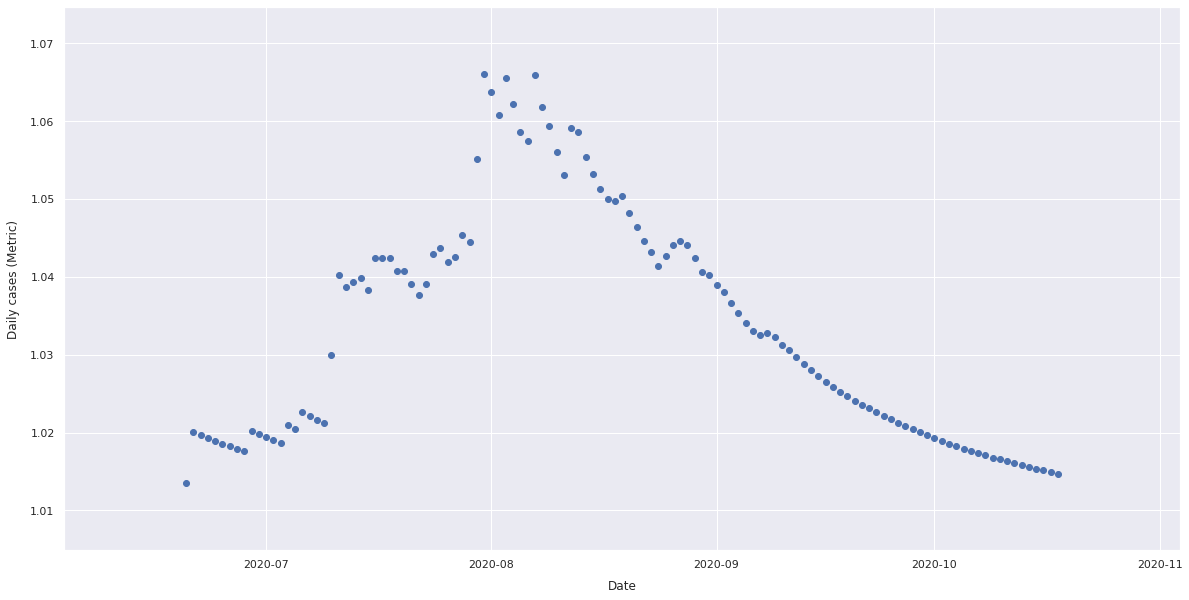

In [32]:
plot_dataset("Zimbabwe") 

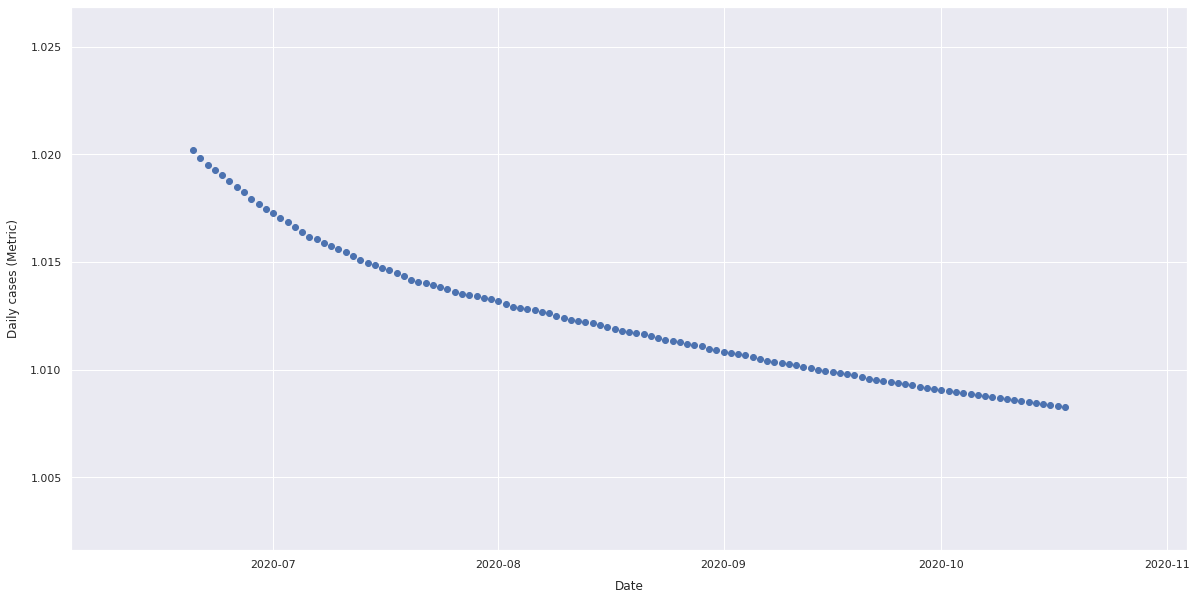

In [33]:
plot_dataset("US")

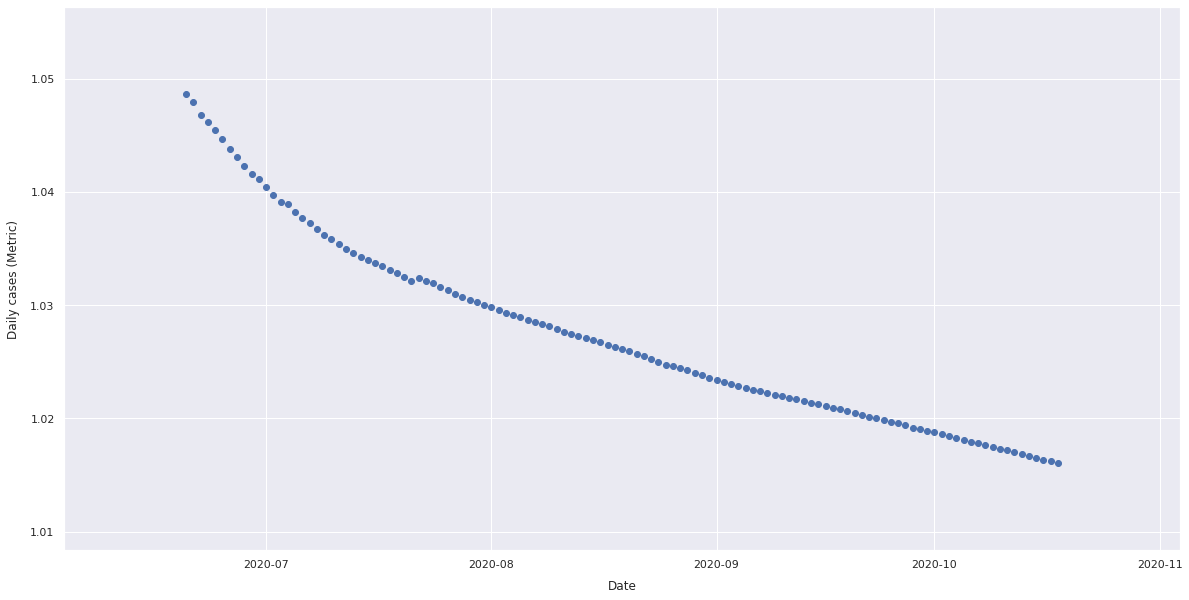

In [34]:
plot_dataset("India")

- For Plotting Linear Line shows data variation

In [35]:
# chnage in datetime format to plot results
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date2']= df['Date'].map(dt.datetime.toordinal)

In [36]:
df.head(2)

,Date,Op,l_m,Date2
0,2020-01-22,0,1.0,737446
1,2020-01-23,0,NaN,737447


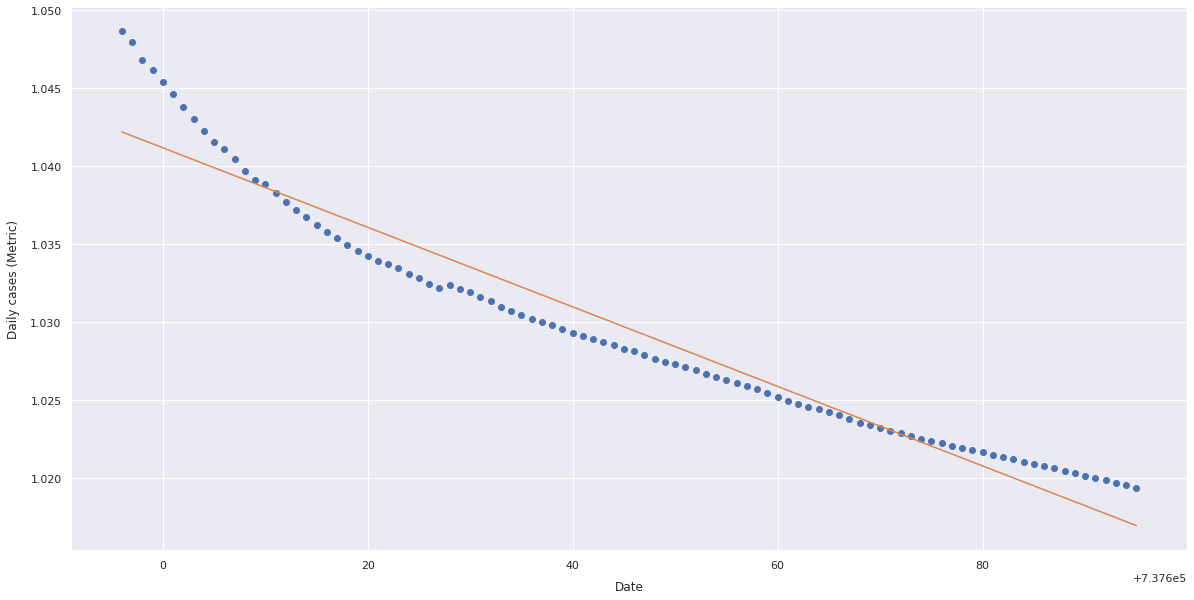

In [37]:
x =df.Date2[150:250]
y =df.l_m[150:250]
fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x, y, 'o')
plt.xlabel("Date", labelpad=10)
plt.ylabel("Daily cases (Metric)", labelpad=10)
m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept
plt.plot(x, m*x + b)

- It was observed that H(t) falls linearly with t. 
- It was observed that linear fall of ln(H(t)) is a fit.

###### Deaths graph is linear descresing as it is following levitt matrix but irrespecitive of it's varibles those leads to change in linear nature so it is decreasing but in slow manner. 

# About

Levitt, who won the 2013 Nobel Prize in chemistry, earlier predicted about the epidemic in China that
it would get through the worst of its devastating outbreak before several other health experts predicted.

###### https://blog.exxactcorp.com/fighting-coronavirus-covid-19-with-data-science-crowdsourcing-3-projects-you-should-know-about/
Guidelines for Coronavirus Prevention & Treatment (CDC)
This is from the CDC, if you’re outside the United States, check with your local or regional governments for additional guidance. There is currently no vaccine to prevent coronavirus disease 2019 (COVID-19). The best way to prevent illness is to avoid being exposed to this virus. However, as a reminder, CDC always recommends everyday preventive actions to help prevent the spread of respiratory diseases, including:

-   Avoid close contact with people who are sick.
-   Avoid touching your eyes, nose, and mouth.
-   Stay home when you are sick.
-   Cover your cough or sneeze with a tissue, then throw the tissue in the trash.
-   Clean and disinfect frequently touched objects and surfaces using a regular household cleaning spray or wipe.
-   Follow CDC’s recommendations for using a facemask.
-   CDC does not recommend that people who are well wear a facemask to protect themselves from respiratory diseases, including COVID-19.
-   Facemasks should be used by people who show symptoms of COVID-19 to help prevent the spread of the disease to  others. The use of facemasks is also crucial for health workers and people who are taking care of someone in close settings (at home or in a health care facility).
-   Wash your hands often with soap and water for at least 20 seconds, especially after going to the bathroom; before eating; and after blowing your nose, coughing, or sneezing.
-   If soap and water are not readily available, use an alcohol-based hand sanitizer with at least 60% alcohol. Always wash hands with soap and water if hands are visibly dirty.


<img src="../Desktop/save.jpeg" />